In [38]:
# Magic command below to enable interactivity in the JupyterLab interface
%matplotlib ipympl
# Some basic imports that are useful
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def n_sided_polygon(n, m, radius=1, center=(0, 0)):
    """Returns a set of points that form an n-sided polygon with m points total, distributed equally between the vertices."""
    if m < n:
        raise ValueError("m must be greater than or equal to n.")
    angles = np.linspace(0, 2 * np.pi, n + 1)[:-1]
    x = center[0] + radius * np.cos(angles)
    y = center[1] + radius * np.sin(angles)
#     if 'inline' in plt.get_backend():
#         # Append the first point to the end to close the polygon
#         x = np.append(x, x[0])
#         y = np.append(y, y[0])
    points = set(zip(x, y))
    num_extra_points = m - n
    if num_extra_points > 0:
        for i in range(n):
            j = (i + 1) % n
            dx = x[j] - x[i]
            dy = y[j] - y[i]
            dist = np.sqrt(dx ** 2 + dy ** 2)
            if dist == 0:
                continue
            step = dist / (num_extra_points / n)
            num_points = int(dist / step)
            if num_points < 1:
                num_points = 1
            xs = np.linspace(x[i], x[j], num_points + 2)[1:-1]
            ys = np.linspace(y[i], y[j], num_points + 2)[1:-1]
            xs = xs.tolist()
            ys = ys.tolist()
            points.update(set(zip(xs, ys)))
    return points

# # Example usage: plot a 5-sided polygon with a total of 8 points
# polygon_points = n_sided_polygon(10, 100)
# plt.plot(*zip(*polygon_points))
# plt.show()


(-1.0, 1.0)

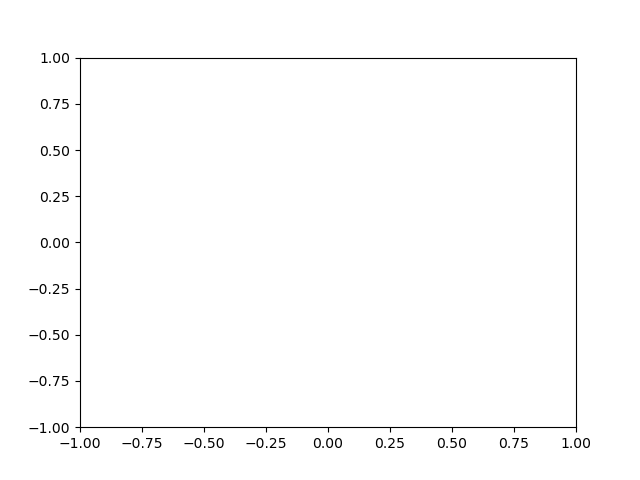

In [39]:
# %matplotlib ipympl
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [])
def init(): 
    ax.set_xlim([-1.5, 1.5]) 
    ax.set_ylim([-1.5,1.5]) 
    return ln,

def update(frame):
    # xdata.append(frame)
    # ydata.append(np.sin(frame))
    xdata, ydata = morph(xs, ys, xc, yc, frame) 
    ln.set_data(xdata, ydata)
    return ln

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])

In [40]:
def split_tuple_set(tuple_set):
    """Splits a set of tuples into two lists: one with the first values of each tuple, and one with the second values."""
    first_values = [t[0] for t in tuple_set]
    second_values = [t[1] for t in tuple_set]
    return first_values, second_values


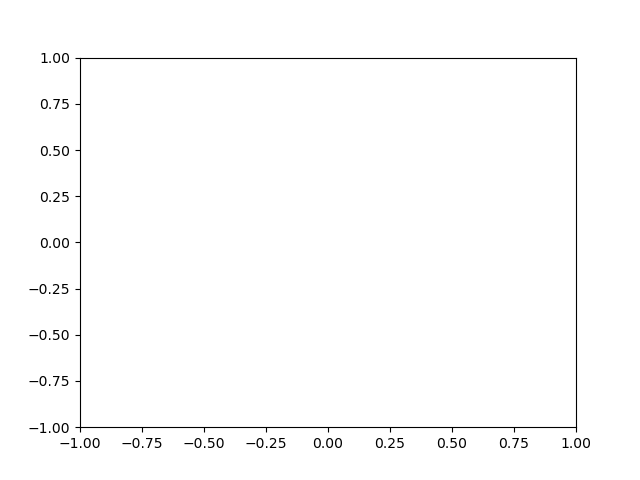

In [41]:
def morph(x1, y1, x2, y2, alpha): 
    xm = alpha * x1 + (1-alpha) * x2 
    ym = alpha * y1 + (1-alpha) * y2 
    return xm, ym

t = np.linspace(3*np.pi/4, -5*np.pi/4, 300) 
if len(t) % 12 != 0:
    raise BaseException("Number of points should be multiple of 4...") 
    
    
xc, yc = split_tuple_set(n_sided_polygon(3, 300))
xs, ys = split_tuple_set(n_sided_polygon(4, 100))

xc = np.array(xc)
xs = np.array(xs)
ys = np.array(ys)
yc = np.array(yc)


def init(): 
    ax.set_xlim([0, 1]) 
    ax.set_ylim([0,1]) 
    return ln,

def update(frame):
    # xdata.append(frame)
    # ydata.append(np.sin(frame))
    xdata, ydata = morph(xs, ys, xc, yc, frame) 
    ln.set_data(xdata, ydata)
    return ln

# print(f"Square: {np.shape(xs)}")
anim = FuncAnimation(fig, update, frames=np.linspace(0, 1, 128), blit=True, interval=10, repeat=True)
plt.show()